In [18]:
import requests
from lxml import html
from IPython.display import Image, display

# 총장님의 프로필 사진과 약력 가져오기

[링크](https://www.korea.ac.kr/mbshome/mbs/university/subview.do?id=university_010202000000) 여기서 총장님의 프로필과 약력을 알 수 있어요.

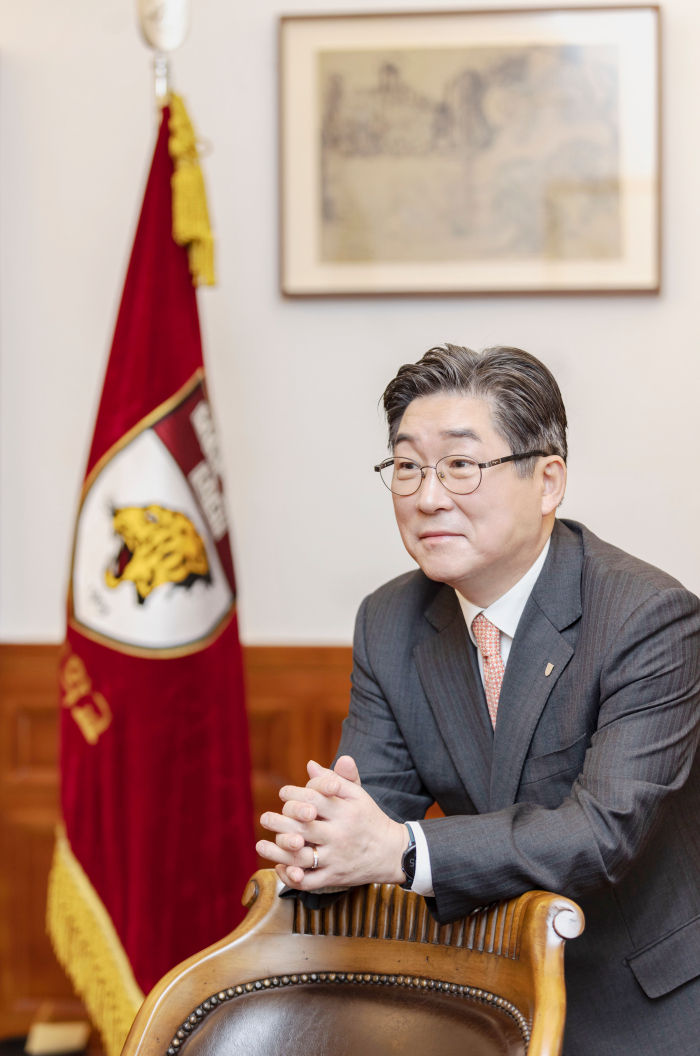

In [26]:
president_img_url = 'https://www.korea.ac.kr/dext5editordata/2023/04/20230404_091647948_72075.jpg'
president_img = requests.get(president_img_url).content
display(Image(president_img))

## 총장님 프사 저장하기

In [27]:
with open('profile_image.jpg','wb') as f:
    f.write(president_img)

## 이번에는 약력을 가져와 보자
 - 개발자 도구를 열어서 아래 크롤링한 페이지와 비교해 봐요.

In [32]:
response = requests.get('https://www.korea.ac.kr/mbshome/mbs/university/subview.do?id=university_010202000000')
president_resume = html.fromstring(response.text)
president_resume

<Element html at 0x7f82c86434f0>

## 우선 개발자 도구에서 내가 가져오기를 원하는 요소를 Elements 탭에서 선택하여 xpath를 복사해 온다.
![chrome xpath](../resources/xpath.gif)

## 약간의 xpath 문법을 알아야 합니다.
### 기본 구조
 - 노드 선택: XPath는 다양한 종류의 노드를 선택할 수 있습니다(예: 요소, 속성, 텍스트 등).
 - 경로 표현: / (루트 노드로부터의 절대 경로), // (문서 내 어느 위치에서나 시작하는 상대 경로) 등을 사용합니다.

### 주요 표현

 - `/`: 루트 노드에서 시작하는 절대 경로를 나타냅니다.
 - `//`: 현재 노드 위치와 관계없이 지정된 노드를 찾습니다.
 - `@`: 속성을 나타냅니다.
 - `*`: 모든 요소를 선택합니다.
 - `[n]`: n번째 요소를 선택합니다 (1부터 시작).


In [37]:
president_resume_text = president_resume.xpath('//*[@id="contents_body"]/div[2]/div[1]/dl//text()')

- **`//*`**: 문서 내의 모든 요소를 선택합니다.
- **`[@id="contents_body"]`**: **`id`** 속성이 **`contents_body`**인 요소를 찾습니다.
- **`/div[2]`**: 선택된 요소의 두 번째 **`div`** 자식을 선택합니다.
- **`/div[1]`**: 그 **`div`** 의 첫 번째 **`div`** 자식을 선택합니다.
- **`/dl`**: 이 **`div`** 의 모든 **`dl`** (정의 목록) 자식 요소를 선택합니다.
- **`//text()`**: 선택된 **`dl`** 요소들 내의 모든 텍스트 노드를 선택합니다.

내용이 더 궁금하면 다음 링크를 참조하세요.(30분이면 xpath 문법을 익힐 수 있어요.)

링크: https://www.w3schools.com/xml/xpath_intro.asp

### 총장님 약력을 파일로 저장하기

In [44]:
president_resume_text = [text.strip("\n ") for text in  president_resume_text ]
president_resume_text = [text for text in  president_resume_text if text !='']
president_resume_text = "\n".join(president_resume_text)

In [45]:
with open('president_resume.txt', 'w') as f:
    f.write(president_resume_text)

## 내가 좋아하는 웹툰을 파일로 저장해보자.

### 이미지 파일들 주소 가져오기: GET 방식이 쓰였음을 기억하기

In [34]:
webtoon_url = 'https://comic.naver.com/webtoon/detail?titleId=478261&no=87&week=thu'
webtoon_page = requests.get(webtoon_url).text
image_list = html.fromstring(webtoon_page).xpath('/html/body/div[1]/div[3]/div[1]//img/@src')
image_list

['https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a14481edb1dfc6be6ffa585_IMAG01_1.jpg',
 'https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a14481edb1dfc6be6ffa585_IMAG01_2.jpg',
 'https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a14481edb1dfc6be6ffa585_IMAG01_3.jpg',
 'https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a14481edb1dfc6be6ffa585_IMAG01_4.jpg',
 'https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a14481edb1dfc6be6ffa585_IMAG01_5.jpg',
 'https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a14481edb1dfc6be6ffa585_IMAG01_6.jpg',
 'https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a14481edb1dfc6be6ffa585_IMAG01_7.jpg',
 'https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a14481edb1dfc6be6ffa585_IMAG01_8.jpg',
 'https://image-comic.pstatic.net/webtoon/478261/87/20231025115949_1bd18eda7a144

In [35]:
for img_url in image_list:
    response = requests.get(img_url)
    print(response)
    break

<Response [403]>


## Response가 4로 시작하면, 실패했다는 뜻입니다. 특히 403 에러는 서버에서 접근을 금지시켜 놓은 것입니다.
 - 네이버에서 Yeti만을 크롤링을 허락했다는 사실을 기억해 내세요.
 - 링크: https://searchadvisor.naver.com/guide/seo-basic-firewall

In [36]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebit/53.7.36 (KHTML, like Gecko) Chrome/63.0.3239.0 Safari/537.36 (compatible; Yeti/1.1; +https://naver.me/spd)',
}
for idx, img_url in enumerate(image_list):
    response = requests.get(img_url, headers=headers)
    with open(str(idx)+'.jpg','wb') as f:
        f.write(response.content)

## 쿠팡 장바구니에 물건 마구마구 담기
 - 쿠팡에 먼저 로그인 해 두세요.
 - 다음 라면 구매 링크로 이동하세요. 링크: https://www.coupang.com/vp/products/7958974?itemId=93553&vendorItemId=3000207618&q=%EC%8B%A0%EB%9D%BC%EB%A9%B4&itemsCount=36&searchId=d0a0c8fb34964c0f939e8de0aa2a3d05&rank=0&isAddedCart=

![coupang ramen](../resources/ramen.gif)

다음 사이트에 이동해서 방금 복사한 내용을 붙여 넣으세요.
 - 링크: https://curlconverter.com/python/

![curl converter](../resources/curl.gif)

In [48]:
# 방금 복사한 내용을 여기 붙여 넣고 실행하세요. 3번 정도 실행해 보고 쿠팡 내 장바구니에 가보세요.

### POST 방식이 쓰였음을 꼭 기억하세요.